In [80]:
import os
from glob import glob
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
os.getcwd()

'C:\\Users\\MIP'

In [82]:
os.listdir('mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [83]:
files = glob('mnist_png/training/0/*.png')
len(files), files[0]

(5923, 'mnist_png/training/0\\1.png')

In [84]:
files = glob('mnist_png/training/*/*.png')
len(files)

60000

In [85]:
label_nums = os.listdir('mnist_png/training/')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [86]:
data_paths = tf.io.matching_files('mnist_png/training/*/*.png')
data_paths

<tf.Tensor: shape=(60000,), dtype=string, numpy=
array([b'mnist_png\\training\\0\\1.png',
       b'mnist_png\\training\\0\\1000.png',
       b'mnist_png\\training\\0\\10005.png', ...,
       b'mnist_png\\training\\9\\9968.png',
       b'mnist_png\\training\\9\\9969.png',
       b'mnist_png\\training\\9\\9998.png'], dtype=object)>

In [87]:
first_image_path = files[0]

In [88]:
image_pil = Image.open(first_image_path)
type(image_pil)

PIL.PngImagePlugin.PngImageFile

In [89]:
image = np.array(image_pil)
type(image), image.shape

(numpy.ndarray, (28, 28))

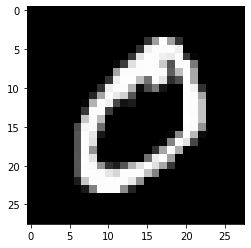

In [90]:
plt.imshow(image, 'gray')
plt.show()

In [91]:
gfile = tf.io.read_file(first_image_path)
type(gfile), gfile.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([]))

In [92]:
image = tf.io.decode_image(gfile)
type(image), image.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([28, 28, 1]))

In [93]:
image = np.array(image)
image.shape

(28, 28, 1)

In [94]:
files[0]

'mnist_png/training\\0\\1.png'

In [95]:
files[0].split('\\')

['mnist_png/training', '0', '1.png']

In [96]:
label = files[0].split('\\')[-2]
label

'0'

In [97]:
label = int(label)
label

0

In [98]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [99]:
files[0], get_label(files[0])

('mnist_png/training\\0\\1.png', 0)

In [100]:
# read & write
from tqdm import tqdm_notebook

In [101]:
heights = []
widths = []
len(files)

60000

In [102]:
for path in tqdm_notebook(files):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    heights.append(h)
    widths.append(w)

In [103]:
np.unique(heights), np.unique(widths)

(array([28]), array([28]))

In [104]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype = tf.float32)
    return image

TypeError: Invalid shape (28, 28, 1) for image data

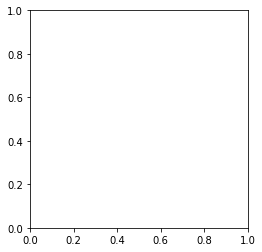

In [105]:
for i in range(8):
    image = read_image(data_paths[i])
    plt.imshow(image)
    plt.show()

In [106]:
def make_batch(batch_paths):
    batch_images = []
    
    for path in batch_paths:
        image = read_image(path)
        #image = cv2.resize(image, (32, 32))
        batch_images.append(image)
        
    return tf.convert_to_tensor(batch_images)

In [107]:
batch_size = 16
for step in range(4):
    batch_img = make_batch(data_paths[step*batch_size:(step+1)*batch_size])
    
    print(batch_img[0].shape)

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [109]:
datagen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            horizontal_flip = True)

In [110]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [111]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

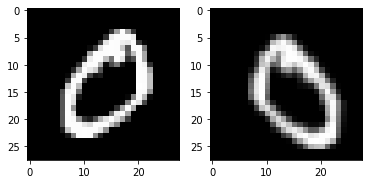

In [112]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')
plt.subplot(122)
plt.imshow(np.squeeze(image), 'gray')
plt.show()

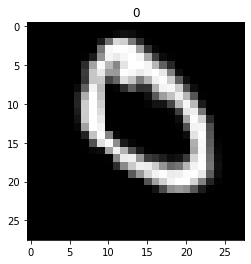

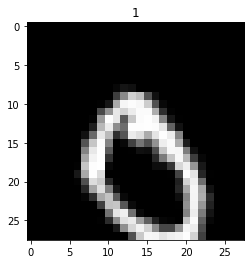

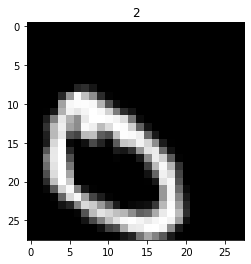

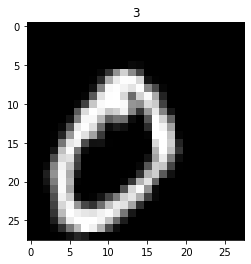

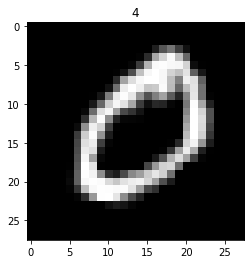

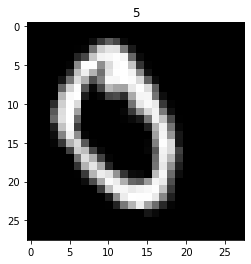

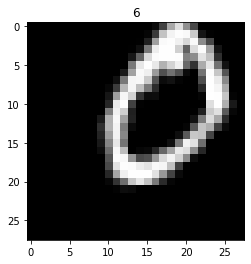

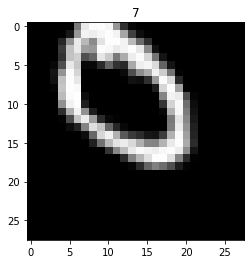

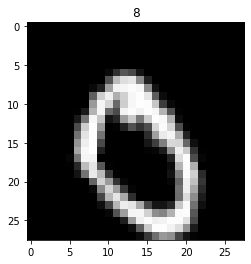

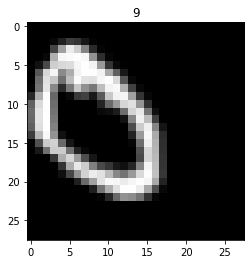

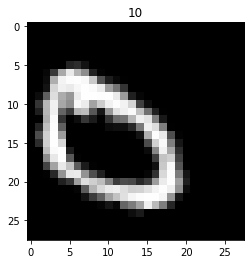

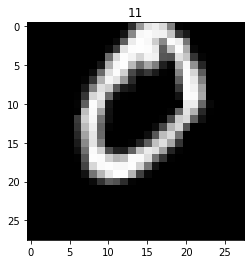

In [113]:
count = 0
for image in datagen.flow(inputs):
    plt.imshow(np.squeeze(image), 'gray')
    plt.title(count)
    plt.show()
    if count > 10:
        break;
    count+=1